In [1]:
import os, gdal
 
in_path = 'E:/Thesis/Data/cropped/'
input_filename = 'F182013.v4c_web.stable_lights.avg_vis.tif'
 
out_path = 'E:/Thesis/Data/cropped/'
output_filename = 'tile_'
 
tile_size_x = 50
tile_size_y = 70
 
ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize
 
for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

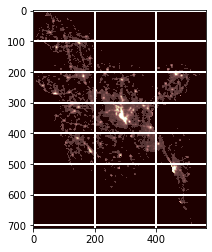

In [2]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from descartes import PolygonPatch

src = rasterio.open("E:/Thesis/Data/cropped/F182011.v4c_web.stable_lights.avg_vis.tif")

with fiona.open("E:/Thesis/Data/bangladesh-latest-free/gis_osm_transport_free_1.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]


plt.imshow(src.read(1), cmap='pink')
plt.grid(color='w', linestyle='-', linewidth=2)
plt.show()

